**Context**

This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.



In [2]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv('/content/heart_disease_data.csv')

In [5]:
df.head()  # taking a look at the dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl (fbs)
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved (thlach)
* exercise induced angina (exang)
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy  (ca)
* thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

### ST depression and ST represnts the ecg metric of the patient the change in ecg metric from normal can cause some illness , so this metric is taken into account

### Exercise-induced angina is chest pain that occurs during or after physical activity due to reduced blood flow to the heart. It's a common symptom of coronary artery disease, which is caused by cholesterol-clogged arteries that supply blood to the heart muscle.


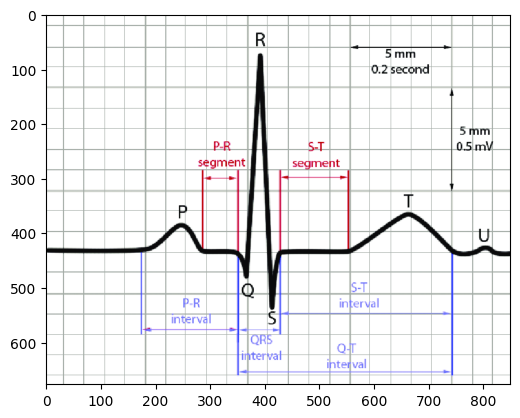

In [6]:
# normal ecg

import matplotlib.pyplot as plt

img=plt.imread('/content/A-diagram-on-the-waveform-of-ECG-in-a-normal-period.png')
plt.imshow(img)

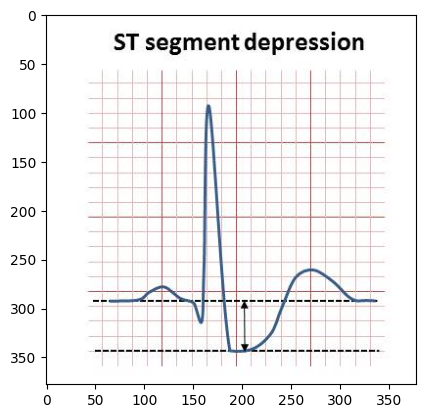

In [7]:
# ST depression

img=plt.imread('/content/ST_depression_illustration-2.jpg')
plt.imshow(img)

visually we can now get the idea of the ST metric

In [8]:
#lets now analyse the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
# every column in the data is numerical


# i can see sex column in int lets check it

df['sex'].value_counts() #1 represents male 0 female

,count
sex,
1,207
0,96


In [10]:
# lets check the null values

df.isnull().sum() #no null values

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [11]:
df['age'].describe() # we can see that the data is above 40 yrs

,age
count,303.000000
mean,54.366337
std,9.082101
min,29.000000
25%,47.500000
50%,55.000000
75%,61.000000
max,77.000000


### EDA

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


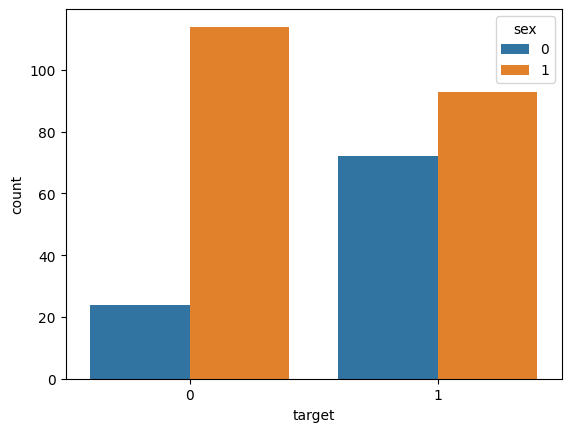

In [12]:
import seaborn as sns

sns.countplot(x='target',hue='sex',data=df)
plt.show()

### there is a balance between men and female who have heart disease


<ipython-input-13-0cd867dbfd5d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


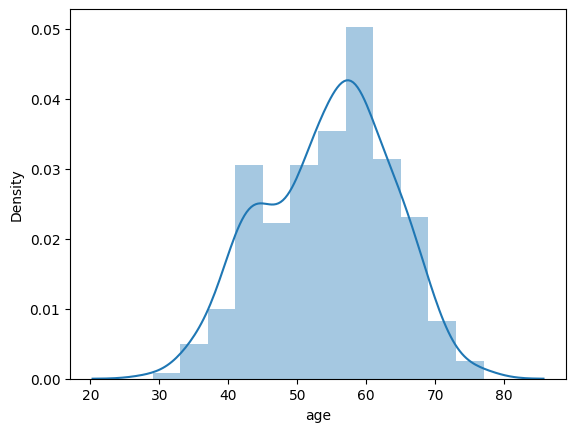

In [13]:
# age

sns.distplot(df['age'])
plt.show()  # shows similarity to normal distribution

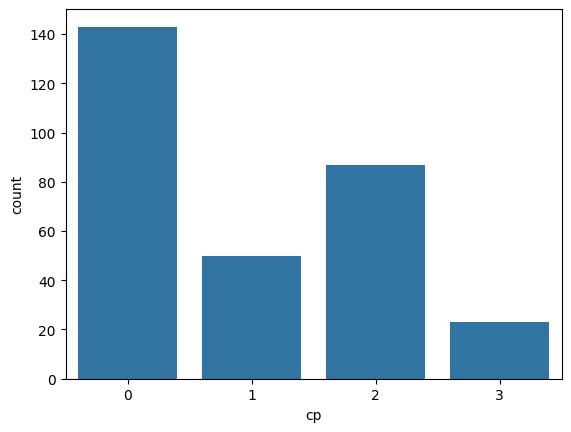

In [14]:
#cp

sns.countplot(x='cp',data=df)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


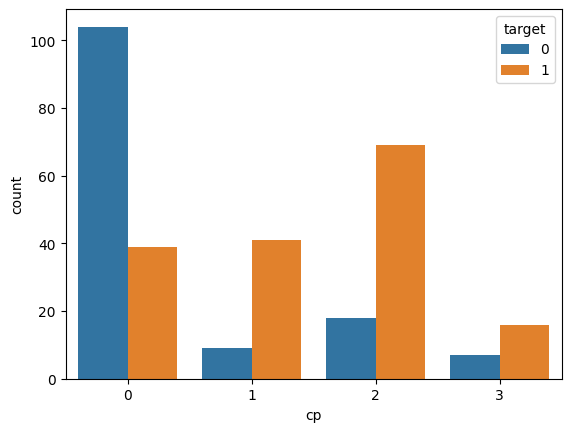

In [15]:
sns.countplot(x='cp',hue='target',data=df)
plt.show()

In [16]:
# 2nd type of chest pain is showing a grater risk and 0 type lower chance

# lets check for 4th tyoe

df['cp'].value_counts()

,count
cp,
0,143
2,87
1,50
3,23


In [17]:
print(df[df['cp']==3]['target'].value_counts())

print((16/23)*100) # 69.5% having type 4th chest pain are having a heart disease

target
1    16
0     7
Name: count, dtype: int64
69.56521739130434


In [18]:
# lets confirm rest others
print('for 1st type of chest pain ', df[df['cp']==0]['target'].value_counts()[1]/df[df['cp']==0]['target'].value_counts()[0]+df[df['cp']==0]['target'].value_counts()[1])
print('for 2nd type of chest pain ', df[df['cp']==1]['target'].value_counts()[1]/df[df['cp']==1]['target'].value_counts()[0]+df[df['cp']==1]['target'].value_counts()[1])
print('for 3rd type of chest pain ', df[df['cp']==2]['target'].value_counts()[1]/df[df['cp']==2]['target'].value_counts()[0]+df[df['cp']==2]['target'].value_counts()[1])


for 1st type of chest pain  39.375
for 2nd type of chest pain  45.55555555555556
for 3rd type of chest pain  72.83333333333333


In [19]:
# we can conclude that the most impact is for 3rd type and 4th type of chest pain

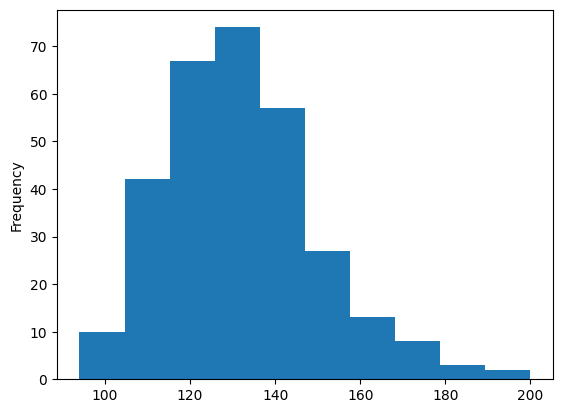

In [20]:
#trstpbs (resting blood pressure)

df['trestbps'].plot.hist()
plt.show() # shows an almmost normal distribution, for most of them it is between 120 and 145

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


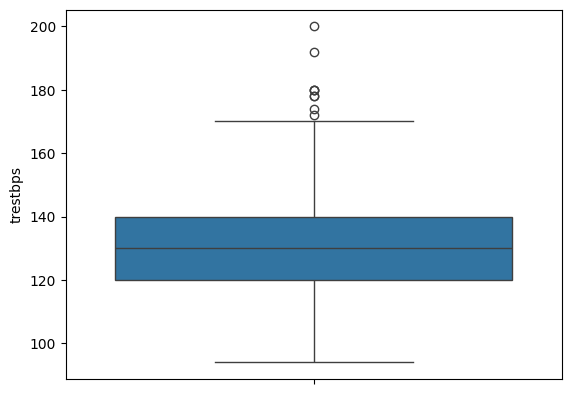

In [21]:
# lets check for outliers

sns.boxplot(df['trestbps'])
plt.show() # there are outliers in the data where people resting heart rate is above 170

In [22]:
#lets check the data with ouliers for resting heart rate

df[df['trestbps']>170].shape # 9 outliers

(9, 14)

In [23]:
df[df['trestbps']>170]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1
110,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
241,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0
248,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
260,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0
266,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0


In [24]:
# even with a above 180 most of 6 of them dont have heart disease, resting rate is not ttoo much dependent on disease

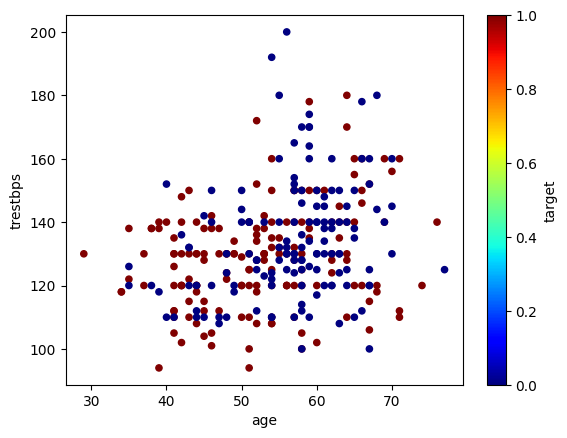

In [25]:
# lets check its relation with age

df.plot.scatter(x='age',y='trestbps',c='target',cmap='jet')
plt.show()   #no abnormal behaviour other than outliers

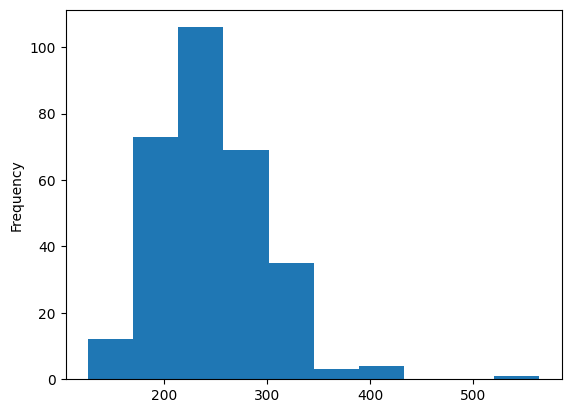

In [26]:
df['chol'].plot.hist()
plt.show()

In [27]:
# shows traits of normal distribution , can observe an abnormal value above 500

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


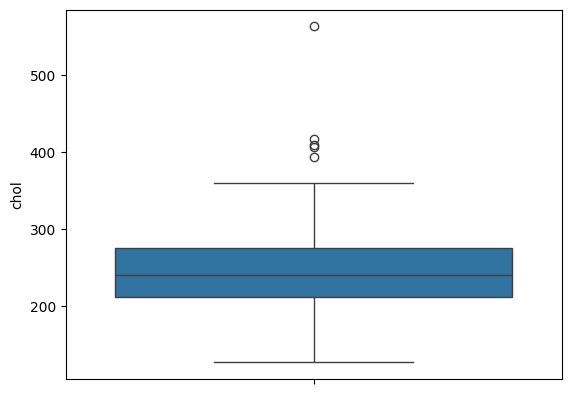

In [28]:
sns.boxplot(df['chol'])
plt.show() #outliers above 350

In [29]:
df[df['chol']>350] #most of them have heart disease with > 350 cholestrol level

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
39,65,0,2,160,360,0,0,151,0,0.8,2,0,2,1
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
96,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
180,55,1,0,132,353,0,1,132,1,1.2,1,1,3,0
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


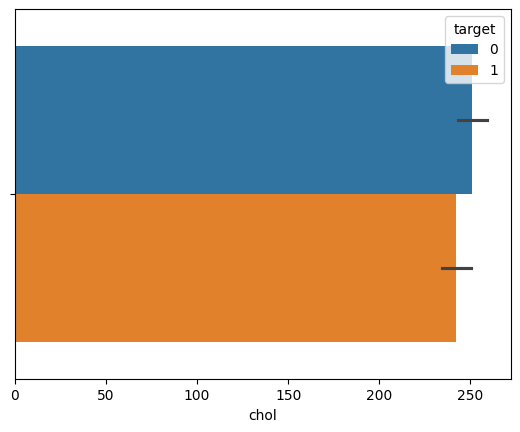

In [30]:
sns.barplot(data=df,x='chol',hue='target')
plt.show()  # there is a balance

In [31]:
#lets check with max heart rate

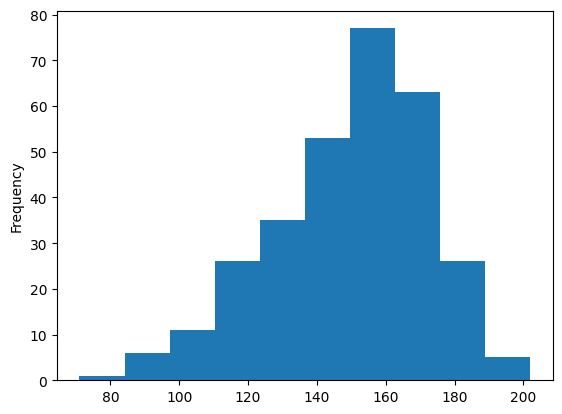

In [32]:
df['thalach'].plot.hist()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


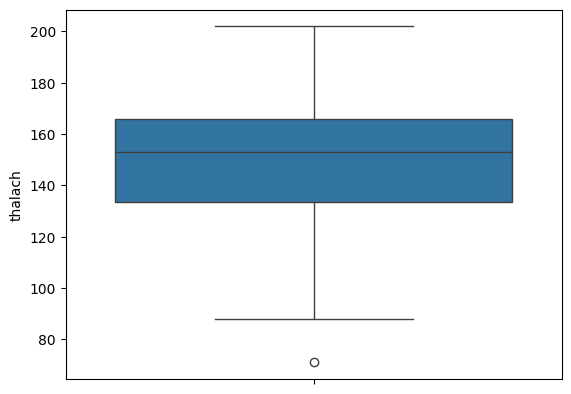

In [33]:
sns.boxplot(df['thalach'])
plt.show() #no outliers

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


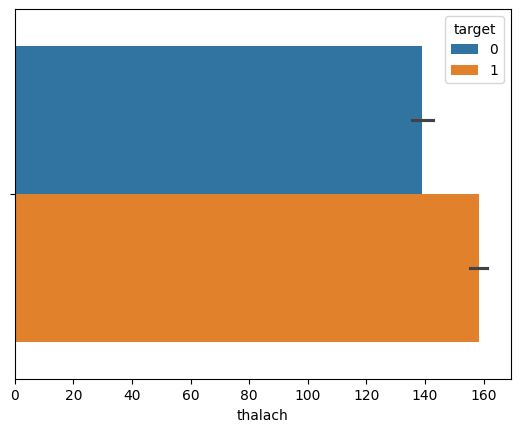

In [34]:
sns.barplot(data=df,x='thalach',hue='target')
plt.show()

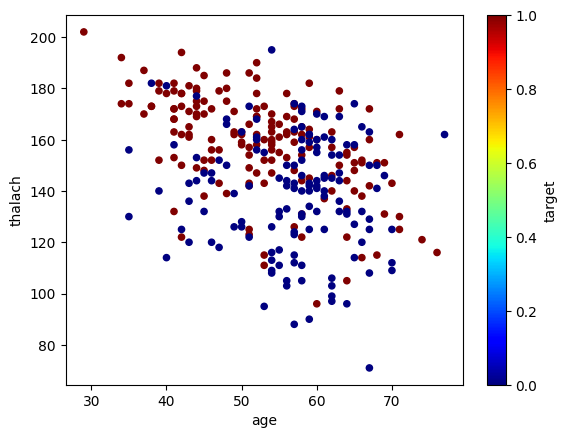

In [35]:
df.plot.scatter(y='thalach',x='age',c='target',cmap='jet')
plt.show()  # we can observe a kind of linear relation

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

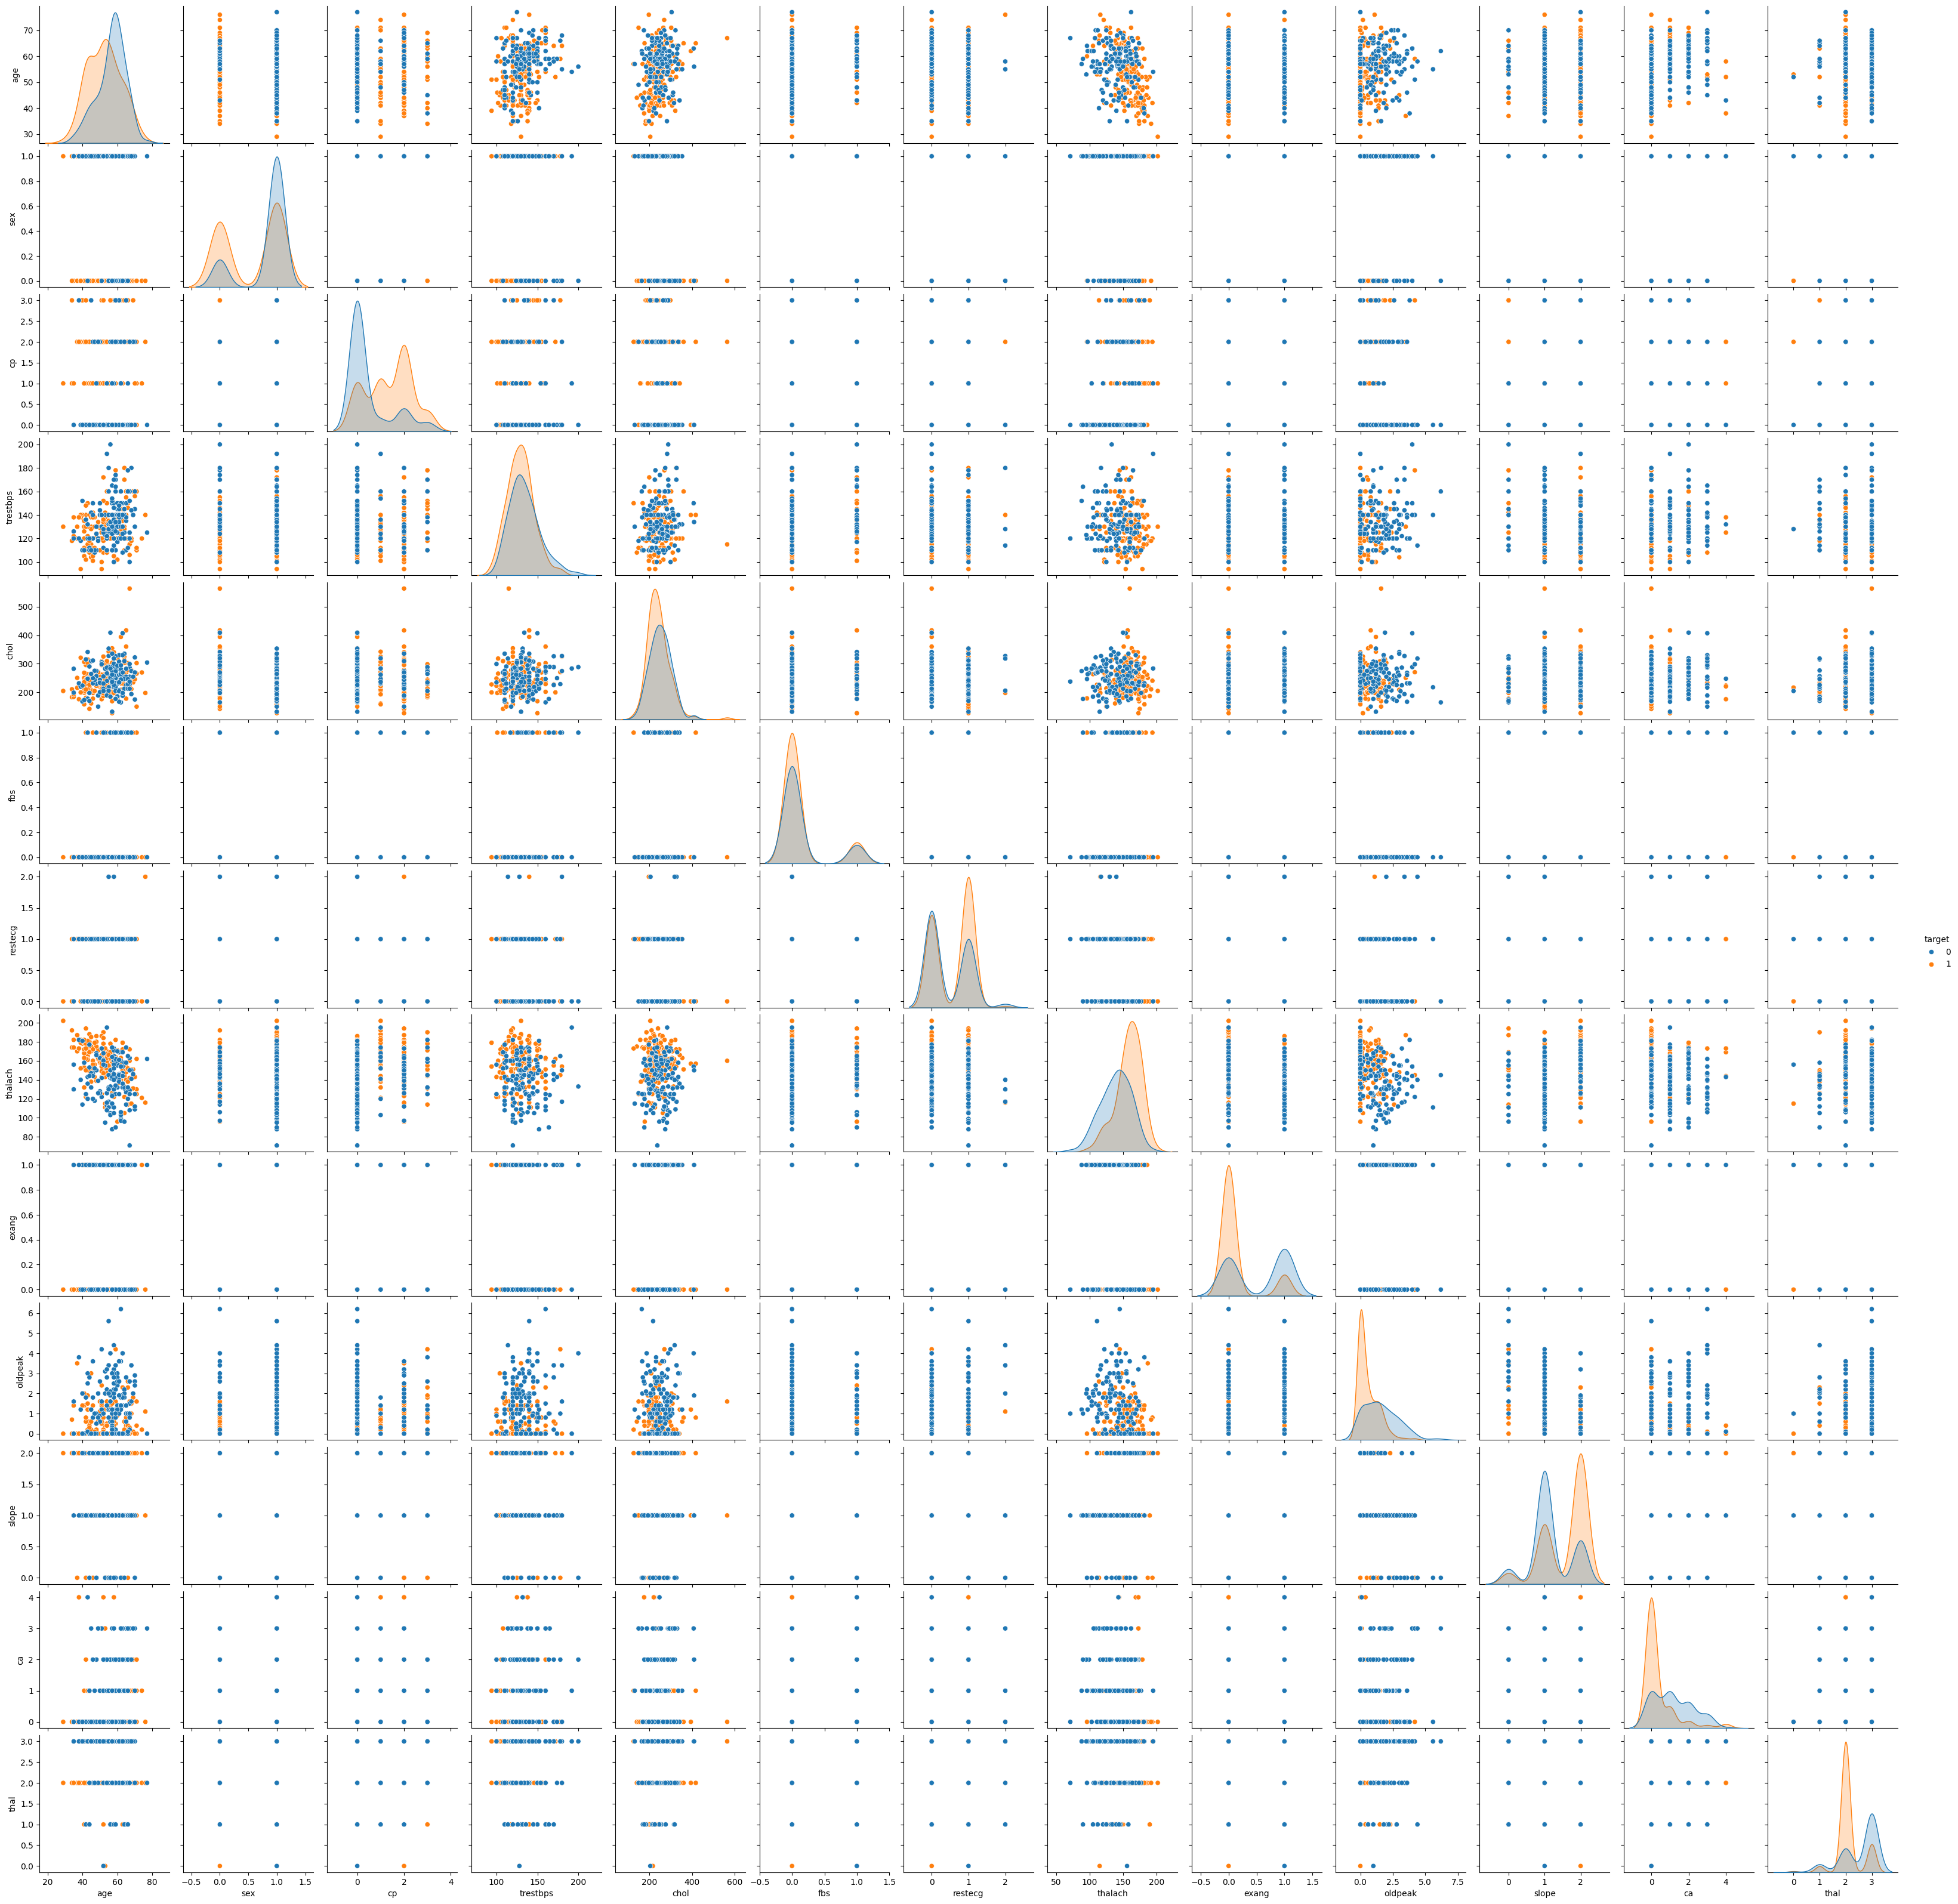

In [36]:
# now lets look into all of the categories and its variations all at once

sns.pairplot(df,hue='target')
plt.show()

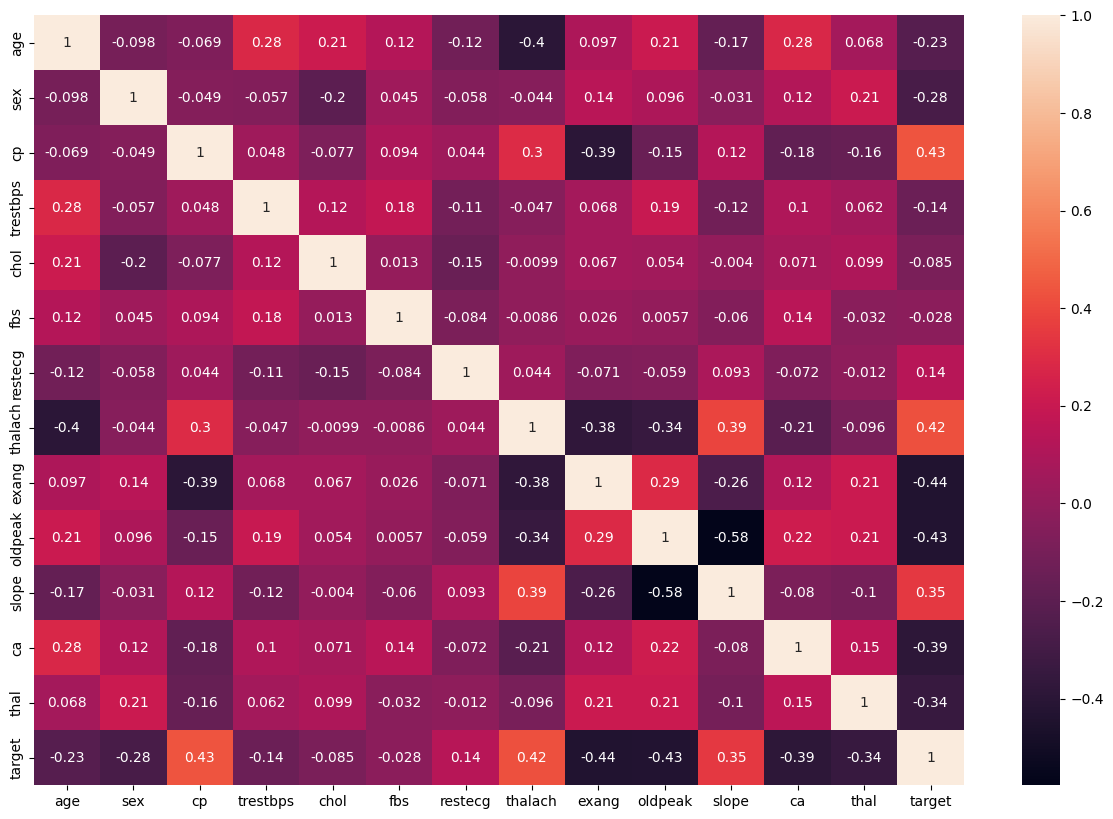

In [37]:
fig=plt.figure(figsize=(15,10))

sns.heatmap(df.corr(),annot=True)
plt.show()

### above we can observe the visual representation of how each column is related to each other and target column

In [38]:
corr=df.corr()
corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [39]:
corr['target'].sort_values(ascending=False)

,target
target,1.000000
cp,0.433798
thalach,0.421741
slope,0.345877
restecg,0.137230
fbs,-0.028046
chol,-0.085239
trestbps,-0.144931
age,-0.225439
sex,-0.280937


In [40]:
#there are few are positively co-related and negatively co-related

# Training the model

In [41]:
df['target'].value_counts() #pretty much balanced data

,count
target,
1,165
0,138


In [42]:
heart=df.copy()

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X=heart.drop('target',axis=1)
y=heart['target']

In [45]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [46]:
y

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
#almost everything in the data is almost cleaned

In [49]:
#lets just apply scalar object to scale the data

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [50]:
sc.fit_transform(X_train)
sc.transform(X_test)

array([[ 2.76218225e-01,  7.22504380e-01, -9.71890936e-01,
         1.16949120e+00,  5.53408401e-01, -3.83300706e-01,
        -1.04610909e+00, -1.70875171e+00,  1.47790748e+00,
        -3.75556294e-01, -6.94988026e-01,  3.21860343e-01,
        -2.19657581e+00],
       [ 4.93953764e-01,  7.22504380e-01,  1.96807914e+00,
         2.36038903e+00,  7.81171723e-01, -3.83300706e-01,
        -1.04610909e+00,  3.98288831e-01, -6.76632341e-01,
        -7.39094787e-01, -6.94988026e-01, -6.89700735e-01,
         1.17848036e+00],
       [ 2.76218225e-01,  7.22504380e-01,  9.88089118e-01,
         1.16949120e+00, -2.29363312e+00,  2.60891771e+00,
         8.43132697e-01,  1.02591793e+00, -6.76632341e-01,
        -7.39094787e-01,  9.53905134e-01,  3.21860343e-01,
         1.17848036e+00],
       [ 1.67350456e-01, -1.38407465e+00, -9.71890936e-01,
         2.16772932e-01,  3.07778522e+00, -3.83300706e-01,
        -1.04610909e+00, -5.18701733e-03,  1.47790748e+00,
         8.05943807e-01, -6.94988026e

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

In [52]:
lr=LogisticRegression()
sgd=SGDClassifier()
svc=SVC()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
ada=AdaBoostClassifier()
gb=GradientBoostingClassifier()
nb=GaussianNB()

In [53]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score

In [54]:
lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)
print(accuracy_score(y_test,y_pred_lr))
print(confusion_matrix(y_test,y_pred_lr))
print(classification_report(y_test,y_pred_lr))
print(precision_score(y_test,y_pred_lr))



0.8852459016393442
[[25  4]
 [ 3 29]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61

0.8787878787878788


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
sgd.fit(X_train,y_train)
y_pred_sgd=sgd.predict(X_test)
print(accuracy_score(y_test,y_pred_sgd))
print(confusion_matrix(y_test,y_pred_sgd))
print(classification_report(y_test,y_pred_sgd))
print(precision_score(y_test,y_pred_sgd))

0.7540983606557377
[[28  1]
 [14 18]]
              precision    recall  f1-score   support

           0       0.67      0.97      0.79        29
           1       0.95      0.56      0.71        32

    accuracy                           0.75        61
   macro avg       0.81      0.76      0.75        61
weighted avg       0.81      0.75      0.75        61

0.9473684210526315


In [56]:
svc.fit(X_train,y_train)
y_pred_svc=svc.predict(X_test)
print(accuracy_score(y_test,y_pred_svc))
print(confusion_matrix(y_test,y_pred_svc))
print(classification_report(y_test,y_pred_svc))
print(precision_score(y_test,y_pred_svc))

0.7049180327868853
[[15 14]
 [ 4 28]]
              precision    recall  f1-score   support

           0       0.79      0.52      0.62        29
           1       0.67      0.88      0.76        32

    accuracy                           0.70        61
   macro avg       0.73      0.70      0.69        61
weighted avg       0.73      0.70      0.69        61

0.6666666666666666


In [57]:
dt.fit(X_train,y_train)
y_pred_dt=dt.predict(X_test)
print(accuracy_score(y_test,y_pred_dt))
print(confusion_matrix(y_test,y_pred_dt))
print(classification_report(y_test,y_pred_dt))
print(precision_score(y_test,y_pred_dt))

0.819672131147541
[[25  4]
 [ 7 25]]
              precision    recall  f1-score   support

           0       0.78      0.86      0.82        29
           1       0.86      0.78      0.82        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

0.8620689655172413


In [58]:
rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)
print(accuracy_score(y_test,y_pred_rf))
print(confusion_matrix(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))
print(precision_score(y_test,y_pred_rf))

0.8852459016393442
[[25  4]
 [ 3 29]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61

0.8787878787878788


In [59]:
ada.fit(X_train,y_train)
y_pred_ada=ada.predict(X_test)
print(accuracy_score(y_test,y_pred_ada))
print(confusion_matrix(y_test,y_pred_ada))
print(classification_report(y_test,y_pred_ada))
print(precision_score(y_test,y_pred_ada))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.8032786885245902
[[25  4]
 [ 8 24]]
              precision    recall  f1-score   support

           0       0.76      0.86      0.81        29
           1       0.86      0.75      0.80        32

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.81      0.80      0.80        61

0.8571428571428571


In [60]:
gb.fit(X_train,y_train)
y_pred_gb=gb.predict(X_test)
print(accuracy_score(y_test,y_pred_gb))
print(confusion_matrix(y_test,y_pred_gb))
print(classification_report(y_test,y_pred_gb))
print(precision_score(y_test,y_pred_gb))

0.7704918032786885
[[23  6]
 [ 8 24]]
              precision    recall  f1-score   support

           0       0.74      0.79      0.77        29
           1       0.80      0.75      0.77        32

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61

0.8


In [61]:
nb.fit(X_train,y_train)
y_pred_nb=nb.predict(X_test)
print(accuracy_score(y_test,y_pred_nb))
print(confusion_matrix(y_test,y_pred_nb))
print(classification_report(y_test,y_pred_nb))
print(precision_score(y_test,y_pred_nb))

0.8688524590163934
[[26  3]
 [ 5 27]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

0.9


In [62]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_test)
  accuracy=accuracy_score(y_test,y_pred)
  precision=precision_score(y_test,y_pred)

  return accuracy,precision


In [63]:
train_classifier(lr,X_train,y_train,X_test,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.8852459016393442, 0.8787878787878788)

In [64]:


model = LogisticRegression(solver='lbfgs', max_iter=10000)  # Increase max_iter and check
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(precision_score(y_test, y_pred))       # solved the warning problem with the increase in max iterations



0.8852459016393442
[[25  4]
 [ 3 29]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61

0.8787878787878788


In [65]:
clfs={'lr':LogisticRegression(max_iter=10000),'sgd':SGDClassifier(),'svc':SVC(),'dt':DecisionTreeClassifier(),'rf':RandomForestClassifier(),'ada':AdaBoostClassifier(),'gb':GradientBoostingClassifier(),'nb':GaussianNB()}

In [66]:
for clf in clfs:
  print(clf)
  print(train_classifier(clfs[clf],X_train,y_train,X_test,y_test))

lr
(0.8852459016393442, 0.8787878787878788)
sgd
(0.8032786885245902, 0.8571428571428571)
svc
(0.7049180327868853, 0.6666666666666666)
dt
(0.819672131147541, 0.8620689655172413)
rf
(0.8524590163934426, 0.8484848484848485)
ada
(0.8032786885245902, 0.8571428571428571)
gb


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


(0.7704918032786885, 0.8)
nb
(0.8688524590163934, 0.9)


In [67]:
accuracy_scores=[]
precision_scores=[]

for name,clf in clfs.items():
  current_accuracy,current_precision=train_classifier(clf,X_train,y_train,X_test,y_test)

  print("For ",name)
  print("Accuracy - ",current_accuracy)
  print("Precision - ",current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)




For  lr
Accuracy -  0.8852459016393442
Precision -  0.8787878787878788
For  sgd
Accuracy -  0.639344262295082
Precision -  0.6
For  svc
Accuracy -  0.7049180327868853
Precision -  0.6666666666666666
For  dt
Accuracy -  0.8524590163934426
Precision -  0.9259259259259259
For  rf
Accuracy -  0.8688524590163934
Precision -  0.875
For  ada
Accuracy -  0.8032786885245902
Precision -  0.8571428571428571


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  gb
Accuracy -  0.7704918032786885
Precision -  0.8
For  nb
Accuracy -  0.8688524590163934
Precision -  0.9


In [68]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Accuracy',ascending=False)


In [69]:
performance_df

,Algorithm,Accuracy,Precision
0,lr,0.885246,0.878788
4,rf,0.868852,0.875000
7,nb,0.868852,0.900000
3,dt,0.852459,0.925926
5,ada,0.803279,0.857143
6,gb,0.770492,0.800000
2,svc,0.704918,0.666667
1,sgd,0.639344,0.600000


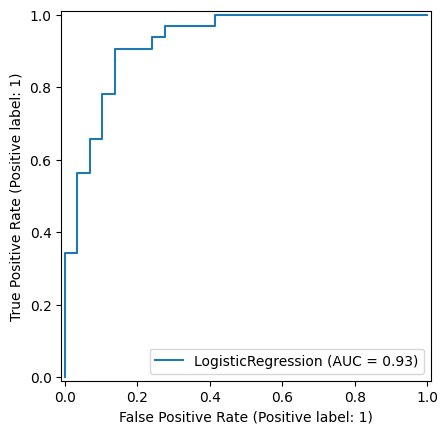

<Figure size 1500x1000 with 0 Axes>

In [95]:
from sklearn.metrics import RocCurveDisplay # Importing the necessary module for ROC curve plotting
import matplotlib.pyplot as plt # Importing for visualization
..

#  use RocCurveDisplay:
RocCurveDisplay.from_estimator(lr, X_test, y_test)
plt.figure(figsize=(15, 10))
plt.show()

#hyperparameter tuning

In [218]:
# from all the models we trained logistic regression showed me promising resluts
# tuning logistic regression parameters can give better results

In [ ]:
#LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='deprecated', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

In [77]:
param_grid = {
    'C': [0.1, 1, 10, 100],   # Inverse of regularization strength
    'penalty': ['l1', 'l2', 'elasticnet', None],  # Regularization technique
    'solver': ['lbfgs', 'saga', 'liblinear'],  # Solver algorithms
    'max_iter':[500,1000,10000]  # Number of iterations


}


In [79]:
from sklearn.model_selection import GridSearchCV

In [80]:
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)


In [81]:
# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
300 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'max_iter': [500, 1000, 10000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'saga', 'liblinear']},
             scoring='accuracy', verbose=1)

In [82]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [83]:
best_params

{'C': 1, 'max_iter': 500, 'penalty': 'l2', 'solver': 'liblinear'}

In [84]:
best_model

LogisticRegression(C=1, max_iter=500, solver='liblinear')

In [91]:
#Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

In [92]:
# Display the best hyperparameters and performance
print("Best Hyperparameters:", best_params)
print("Test Set Accuracy:", accuracy)
print("Test Set Precision:", precision)

Best Hyperparameters: {'C': 1, 'max_iter': 500, 'penalty': 'l2', 'solver': 'liblinear'}
Test Set Accuracy: 0.8688524590163934
Test Set Precision: 0.875


# finally we got best the model and the best parameters